In [1]:
from pathlib import Path
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from data_scripts import *

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

sns.set_theme(
    # context="talk",
    context="paper",
    # rc={"figure.figsize": (8, 6)},
    palette="bright",
    style="whitegrid",
    rc=tex_fonts,
)

CONVERGED = False
NUM_SIMS = 5
YEAR = 365 * 24 * 60 * 60
USE_SIMULATED_TIME = False

if USE_SIMULATED_TIME:
    X_LABEL = "Simulated time, years"
else:
    X_LABEL = "Time step number"


data = {
    "CPR": load_data("thermal_cpr", n_newest=NUM_SIMS),
    "Schur": load_data("thermal_schur", n_newest=NUM_SIMS),
    "Random": load_data("thermal_random", n_newest=NUM_SIMS),
    "Solver selection": load_data("thermal_dynamic", n_newest=NUM_SIMS),
}

save_media_path = Path('media')
save_media_path.mkdir(exist_ok=True)

Loading data:
/home/firedrake/solver_selector/examples/1/performance/thermal_cpr_30.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_cpr_31.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_cpr_32.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_cpr_33.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_cpr_34.npy


/home/firedrake/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


Loading data:
/home/firedrake/solver_selector/examples/1/performance/thermal_schur_23.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_schur_24.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_schur_25.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_schur_26.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_schur_27.npy
Loading data:
/home/firedrake/solver_selector/examples/1/performance/thermal_random_23.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_random_24.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_random_25.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_random_26.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_random_27.npy
Loading data:
/home/firedrake/solver_selector/examples/1/performance/thermal_dynamic_37.npy
/home/firedrake/solver_selector/examples/1/performance/thermal_dynamic_38.npy
/home/firedrake/solver_selector/examp

CPR 0.37928056716918945 0.0
CPR 0.3741337060928345 0.010293722152709961
CPR 0.375593900680542 0.010293722152709961
CPR 0.375557005405426 0.010293722152709961
CPR 0.37424721717834475 0.010293722152709961
Schur 0.581066370010376 0.0
Schur 0.5833562612533569 0.004579782485961914
Schur 0.5911652247111002 0.025716781616210938
Schur 0.5916059613227844 0.025716781616210938
Schur 0.5906924724578857 0.025716781616210938
Random 0.5760133266448975 0.0
Random 0.5791143178939819 0.006201982498168945
Random 0.512433926264445 0.2031421661376953
Random 0.5311639308929443 0.2082808017730713
Random 0.5434738636016846 0.21364045143127441
Solver selection 0.6306097507476807 0.0
Solver selection 0.6231166124343872 0.014986276626586914
Solver selection 0.6088411013285319 0.050319671630859375
Solver selection 0.603736162185669 0.050319671630859375
Solver selection 0.5555809497833252 0.26764965057373047


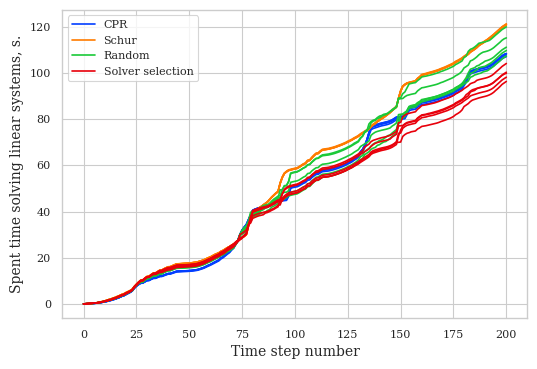

In [2]:
color_iter = -1
plt.figure(figsize=(6, 4))
for name, values in data.items():
    color_iter += 1
    total = []
    make_label = True
    for perf in values:
        result = sum_per_time_step(
            make_solve_linear_system_time(perf, converged=CONVERGED),
            perf,
            converged=CONVERGED,
        )

        total.append(result[-1])
        result = np.cumsum(result)
        x = np.arange(len(result))
        if USE_SIMULATED_TIME:
            x = make_simulation_time(perf, converged=CONVERGED) / YEAR

        if make_label:
            plt.plot(x, result, color=f"C{color_iter}", label=name)
            make_label = False
        else:
            plt.plot(x, result, color=f"C{color_iter}")
        print(name, np.mean(total), np.max(total) - np.min(total))

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Spent time solving linear systems, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

CPR 108.00784416198731 1.3468151092529297
Schur 121.00461912155151 0.5051400661468506
Random 112.68952126502991 12.578526258468628
Solver selection 99.77531518936158 7.770065546035767


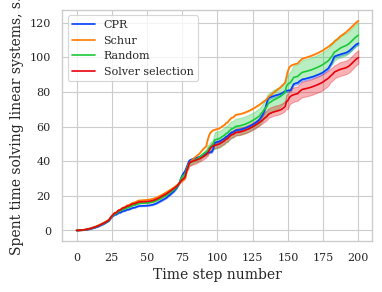

In [3]:
color_iter = -1
best_time = float('inf')
plt.figure(figsize=(4, 3))
for name, values in data.items():
    result = []
    times = []
    color_iter += 1

    for perf in values:
        vals = np.cumsum(
            sum_per_time_step(
                make_solve_linear_system_time(perf, converged=CONVERGED),
                perf,
                converged=CONVERGED,
            )
        )
        result.append(vals)
        if USE_SIMULATED_TIME:
            times.append(make_simulation_time(perf, converged=CONVERGED) / YEAR)
        else:
            times.append(np.arange(len(vals)))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, result):
        total.append(result[-1])
        t_end.append(time[-1])
        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)
    if mean[-1] < best_time:
        best_time = mean[-1]
        best = mean
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    if USE_SIMULATED_TIME:
        assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Spent time solving linear systems, s.")

if save_media_path is not None:
    plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

CPR 108.00784416198731 1.3468151092529297
Schur 121.00461912155151 0.5051400661468506
Random 112.68952126502991 12.578526258468628
Solver selection 99.77531518936158 7.770065546035767


Text(0, 0.5, 'Spent time solving linear systems, s.')

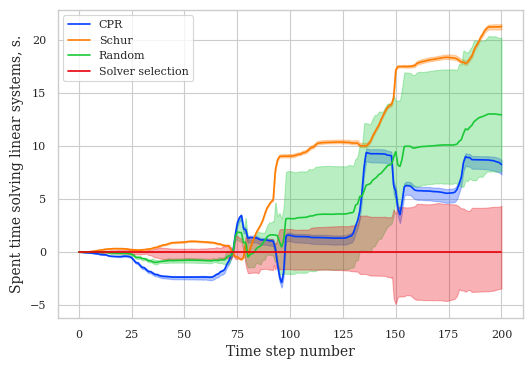

In [4]:
color_iter = -1
plt.figure(figsize=(6, 4))
for name, values in data.items():
    result = []
    times = []
    color_iter += 1

    for perf in values:
        vals = np.cumsum(
            sum_per_time_step(
                make_solve_linear_system_time(perf, converged=CONVERGED),
                perf,
                converged=CONVERGED,
            )
        )
        result.append(vals)
        if USE_SIMULATED_TIME:
            times.append(make_simulation_time(perf, converged=CONVERGED) / YEAR)
        else:
            times.append(np.arange(len(vals)))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, result):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0) - best
    min_ = np.min(interp_data, axis=0) - best
    mean = np.mean(interp_data, axis=0) - best
    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Spent time solving linear systems, s.")

# if save_media_path is not None:
#     plt.savefig(save_media_path / "thermal_performance.pdf", bbox_inches="tight")

CPR (average)


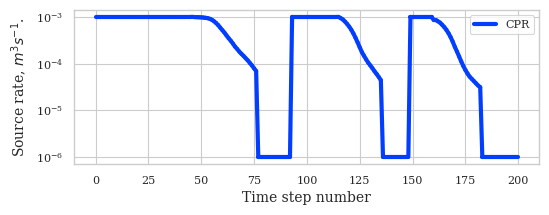

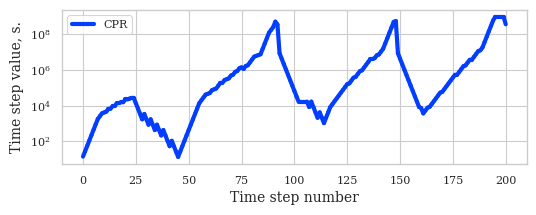

Schur (average)


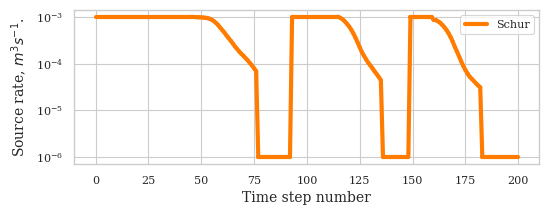

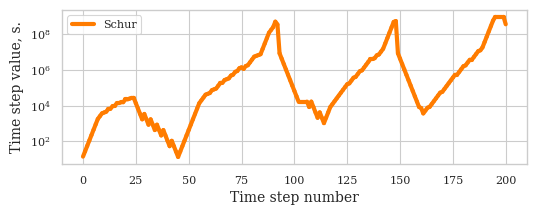

Random (average)


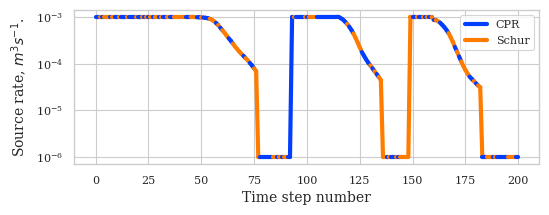

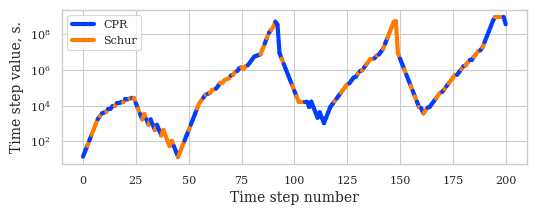

Solver selection (average)


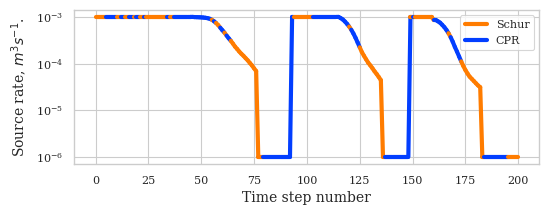

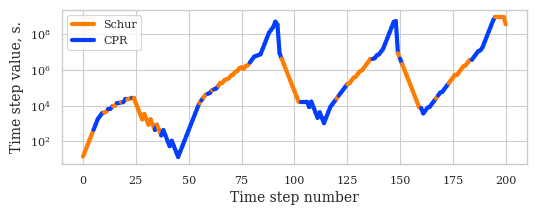

In [5]:
def color_using_schur(x, values, using_schur):
    lw = 3
    if not USE_SIMULATED_TIME:
        x = np.arange(values.size)
    cpr_color = "C0"
    schur_color = "C1"
    label_schur = False
    label_cpr = False

    for i in range(len(x)):
        x_ = x[i : i + 2]
        val = values[i : i + 2]
        if not using_schur[i]:
            kwargs = dict(color=cpr_color)
            if not label_cpr:
                kwargs["label"] = "CPR"
                label_cpr = True
        else:
            kwargs = dict(color=schur_color)
            if not label_schur:
                kwargs["label"] = "Schur"
                label_schur = True
        plt.plot(x_, val, linewidth=lw, **kwargs)
        plt.legend()


def make_using_schur_indices(perf: Sequence[SolverSelectionData], converged=True):
    using_schur = np.array(
        ["schur_cd" in data.config["gmres"]["preconditioner"] for data in perf]
    )
    if converged:
        return using_schur[make_converged_indices(perf)]
    return using_schur


def make_average_decision(values):
    values = np.array(values, dtype=int)
    values = values.sum(axis=0)
    mean = NUM_SIMS / 2
    return values > mean


for name, vals in data.items():
    using_schur_list = []
    time_step_list = []
    inlet_rate_list = []
    sim_time_list = []
    for perf in vals:
        using_schur_list.append(make_using_schur_indices(perf, converged=CONVERGED))
        time_step_list.append(make_time_step(perf, converged=CONVERGED))
        inlet_rate_list.append(make_inlet_rate(perf, converged=CONVERGED))
        sim_time_list.append(make_simulation_time(perf, converged=CONVERGED))

    using_schur_mean = make_average_decision(using_schur_list)

    print(name, "(average)")
    plt.figure(figsize=(6, 2))
    color_using_schur(sim_time_list[0], inlet_rate_list[0], using_schur_mean)
    plt.ylabel("Source rate, $m^3 s^{-1}$.")
    plt.xlabel(X_LABEL)
    plt.yscale("log")
    if save_media_path is not None:
        plt.savefig(save_media_path / f"thermal_source_{name}.pdf", bbox_inches="tight")
    plt.show()

    plt.figure(figsize=(6, 2))
    plt.ylabel("Time step value, s.")
    plt.xlabel(X_LABEL)
    color_using_schur(sim_time_list[0], time_step_list[0], using_schur_mean)
    plt.yscale("log")
    if save_media_path is not None:
        plt.savefig(save_media_path / f"thermal_dt_{name}.pdf", bbox_inches="tight")
    plt.show()

CPR 0.37424721717834475 0.010293722152709961
Schur 0.5906924724578857 0.025716781616210938


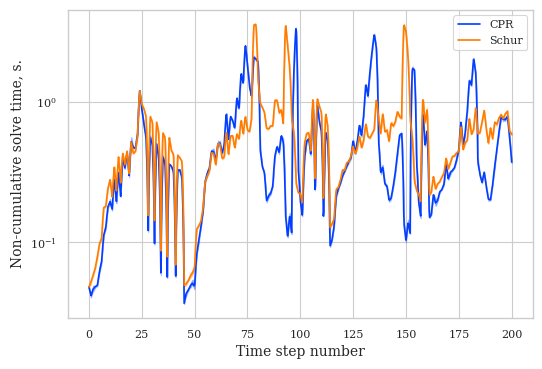

In [6]:
color_iter = -1
plt.figure(figsize=(6, 4))

for name, values in data.items():
    if name not in ('CPR', 'Schur'):
        continue
    result = []
    times = []
    color_iter += 1

    for perf in values:
        vals = sum_per_time_step(
            make_solve_linear_system_time(perf, converged=CONVERGED),
            perf,
            converged=CONVERGED,
        )
        result.append(vals)
        if USE_SIMULATED_TIME:
            times.append(make_simulation_time(perf, converged=CONVERGED) / YEAR)
        else:
            times.append(np.arange(len(vals)))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, result):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)

    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Non-cumulative solve time, s.")
plt.yscale('log')

CPR 63.0 0.0
Schur 43.0 0.0


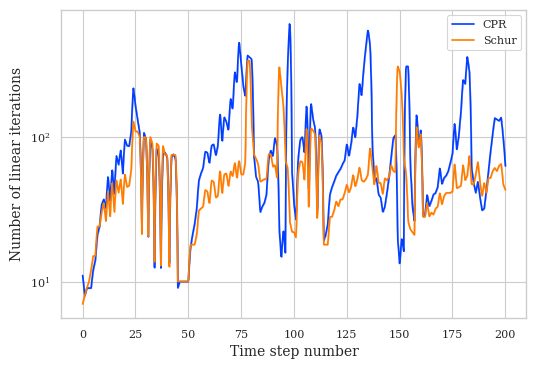

In [7]:
color_iter = -1
plt.figure(figsize=(6, 4))

for name, values in data.items():
    if name not in ('CPR', 'Schur'):
        continue
    result = []
    times = []
    color_iter += 1

    for perf in values:
        vals = sum_per_time_step(
            make_num_linear_iters(perf, converged=CONVERGED),
            perf,
            converged=CONVERGED,
        )
        result.append(vals)
        if USE_SIMULATED_TIME:
            times.append(make_simulation_time(perf, converged=CONVERGED) / YEAR)
        else:
            times.append(np.arange(len(vals)))

    total = []
    t_end = []
    interp_data_list = []
    x_space = np.linspace(times[0][0], times[0][-1], 1000)
    for time, result in zip(times, result):
        total.append(result[-1])
        t_end.append(time[-1])

        interp_data_list.append(np.interp(x_space, time, result))

    interp_data = np.array(interp_data_list)
    max_ = np.max(interp_data, axis=0)
    min_ = np.min(interp_data, axis=0)
    mean = np.mean(interp_data, axis=0)

    plt.fill_between(x_space, min_, max_, color=f"C{color_iter}", alpha=0.3)
    plt.plot(x_space, mean, color=f"C{color_iter}", label=name)
    print(name, np.mean(total), np.max(total) - np.min(total))
    assert np.allclose(t_end, t_end[0], rtol=1e-10)

plt.legend()
plt.xlabel(X_LABEL)
plt.ylabel("Number of linear iterations")
plt.yscale('log')